# Project: Wrangling and Analyze Data

### INTRODUCTION

The code below gathers data from a twitter handle "WeRateDogs" and subsequently assesses the data, cleans the data, analyzes the data, visualized the data, and produces report on the result of the code

#### Importing of relevant libraries for this project

In [1]:
#Import relevant libraries


import pandas as pd

import requests
import tweepy
import io

import re

import seaborn as sns
import matplotlib.pyplot as plt

import string
from pprint import pprint



import subprocess

In [2]:
space = string.whitespace

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
dataframe_1 = pd.read_csv("twitter-archive-enhanced-2.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv").content
dataframe_2 = pd.read_csv(io.StringIO(r.decode('utf-8')), sep="\t")


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
dataframe_3 = pd.read_json(r'tweet-json.txt', lines=True).to_csv('tweet-json.csv', index=False)

dataframe_3 = pd.read_csv("tweet-json.csv")

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



##### Inspection of Dataframe 1

View general arrangement of column in the data frame

In [6]:
# We first see the nature of the arrange and general appearance of dataframe

dataframe_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Checking for duplicate rows in the data frame

In [7]:
dataframe_1.duplicated().sum()

0

Closer look on each column properties, number of non null value in each column

In [8]:
dataframe_1['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [9]:
#For a closer observation 
dataframe_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Summary of dataframe statistics

In [10]:
#to view a summary statistics of the said dataframe
dataframe_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


View of the distribution of the data to identify skewed data

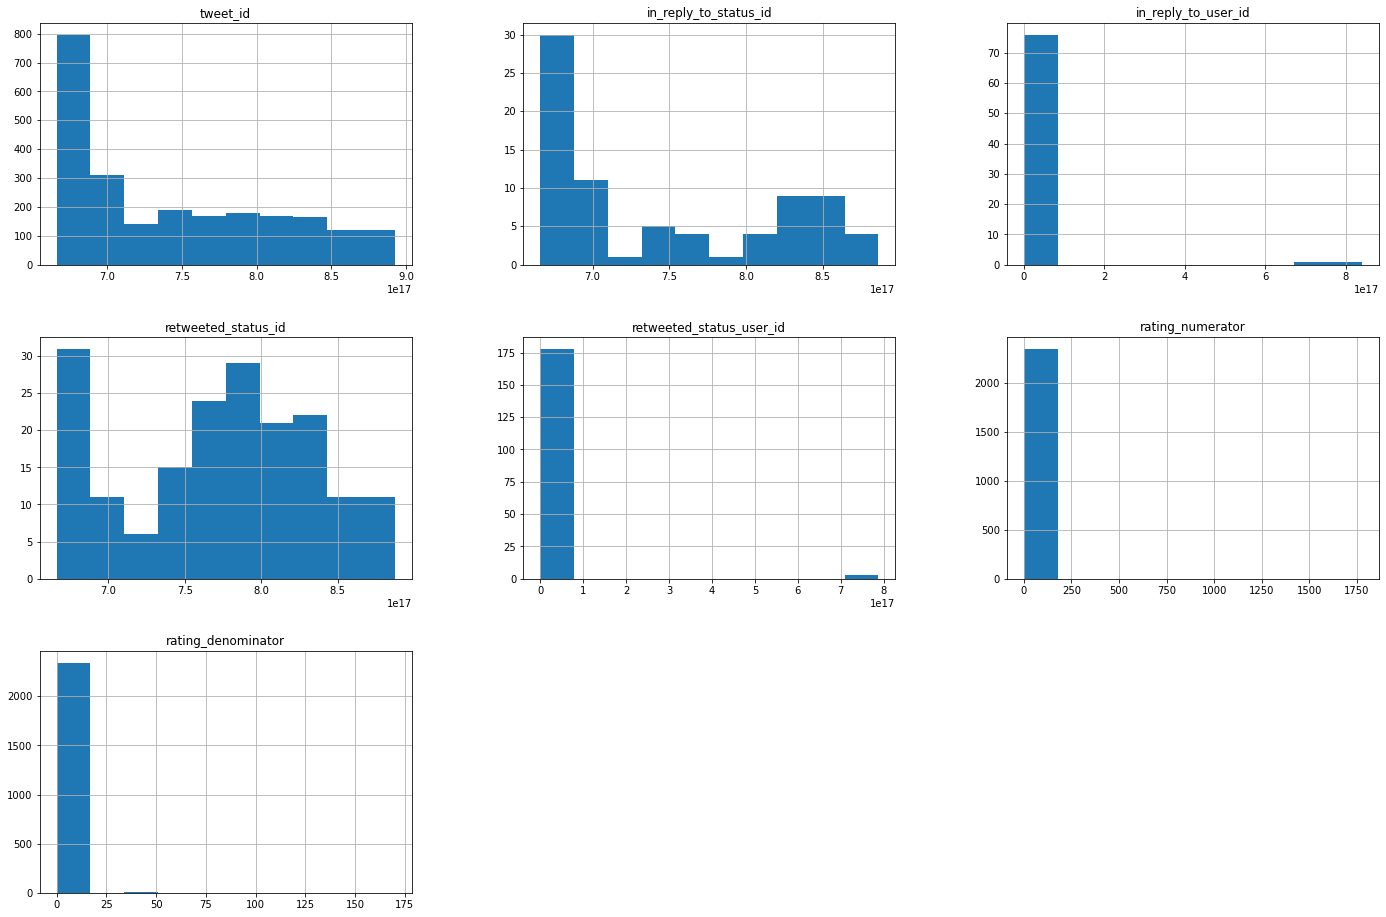

In [11]:
dataframe_1.hist(figsize = (24,16));

Identity the number of distinct values per column in this dataframe

In [12]:
dataframe_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

Closer look at some columns

'name' column

In [13]:
s = dataframe_1['name'].value_counts()



pprint(s.to_dict())

{'Abby': 2,
 'Ace': 1,
 'Acro': 1,
 'Adele': 1,
 'Aiden': 1,
 'Aja': 1,
 'Akumi': 1,
 'Al': 1,
 'Albert': 2,
 'Albus': 2,
 'Aldrick': 1,
 'Alejandro': 1,
 'Alexander': 1,
 'Alexanderson': 1,
 'Alf': 1,
 'Alfie': 5,
 'Alfy': 1,
 'Alice': 2,
 'Amber': 1,
 'Ambrose': 1,
 'Amy': 1,
 'Amélie': 1,
 'Anakin': 2,
 'Andru': 1,
 'Andy': 1,
 'Angel': 1,
 'Anna': 1,
 'Anthony': 1,
 'Antony': 1,
 'Apollo': 1,
 'Aqua': 1,
 'Archie': 4,
 'Arlen': 1,
 'Arlo': 1,
 'Arnie': 3,
 'Arnold': 1,
 'Arya': 1,
 'Ash': 2,
 'Asher': 1,
 'Ashleigh': 1,
 'Aspen': 2,
 'Astrid': 2,
 'Atlas': 2,
 'Atticus': 2,
 'Aubie': 1,
 'Augie': 1,
 'Autumn': 1,
 'Ava': 2,
 'Axel': 2,
 'Bailey': 7,
 'Baloo': 2,
 'Balto': 2,
 'Banditt': 1,
 'Banjo': 1,
 'Barclay': 1,
 'Barney': 1,
 'Baron': 1,
 'Barry': 1,
 'Batdog': 1,
 'Bauer': 1,
 'Baxter': 2,
 'Bayley': 1,
 'BeBe': 1,
 'Bear': 4,
 'Beau': 4,
 'Beckham': 1,
 'Beebop': 1,
 'Beemo': 1,
 'Bell': 2,
 'Bella': 6,
 'Belle': 2,
 'Ben': 1,
 'Benedict': 2,
 'Benji': 2,
 'Benny': 1,
 'Ben

 'Rambo': 1,
 'Randall': 1,
 'Raphael': 1,
 'Rascal': 1,
 'Raymond': 2,
 'Reagan': 1,
 'Reese': 3,
 'Reggie': 4,
 'Reginald': 4,
 'Remington': 2,
 'Remus': 1,
 'Remy': 1,
 'Reptar': 1,
 'Rey': 1,
 'Rhino': 1,
 'Richie': 1,
 'Ricky': 1,
 'Ridley': 1,
 'Riley': 4,
 'Rilo': 1,
 'Rinna': 1,
 'River': 1,
 'Rizzo': 1,
 'Rizzy': 2,
 'Robin': 1,
 'Rocco': 2,
 'Rocky': 2,
 'Rodman': 1,
 'Rodney': 1,
 'Rolf': 1,
 'Romeo': 2,
 'Ron': 1,
 'Ronduh': 1,
 'Ronnie': 1,
 'Rontu': 1,
 'Rooney': 1,
 'Roosevelt': 2,
 'Rorie': 1,
 'Rory': 3,
 'Roscoe': 1,
 'Rose': 1,
 'Rosie': 3,
 'Rover': 1,
 'Rubio': 2,
 'Ruby': 4,
 'Rudy': 1,
 'Rueben': 1,
 'Ruffles': 1,
 'Rufio': 1,
 'Rufus': 2,
 'Rumble': 1,
 'Rumpole': 1,
 'Rupert': 1,
 'Rusty': 6,
 'Sadie': 8,
 'Sage': 1,
 'Sailer': 1,
 'Sailor': 1,
 'Sam': 2,
 'Sammy': 5,
 'Sampson': 4,
 'Samsom': 1,
 'Samson': 3,
 'Sandra': 1,
 'Sandy': 2,
 'Sansa': 2,
 'Sarge': 2,
 'Saydee': 1,
 'Schnitzel': 1,
 'Schnozz': 1,
 'Scooter': 4,
 'Scott': 1,
 'Scout': 6,
 'Scruffers':

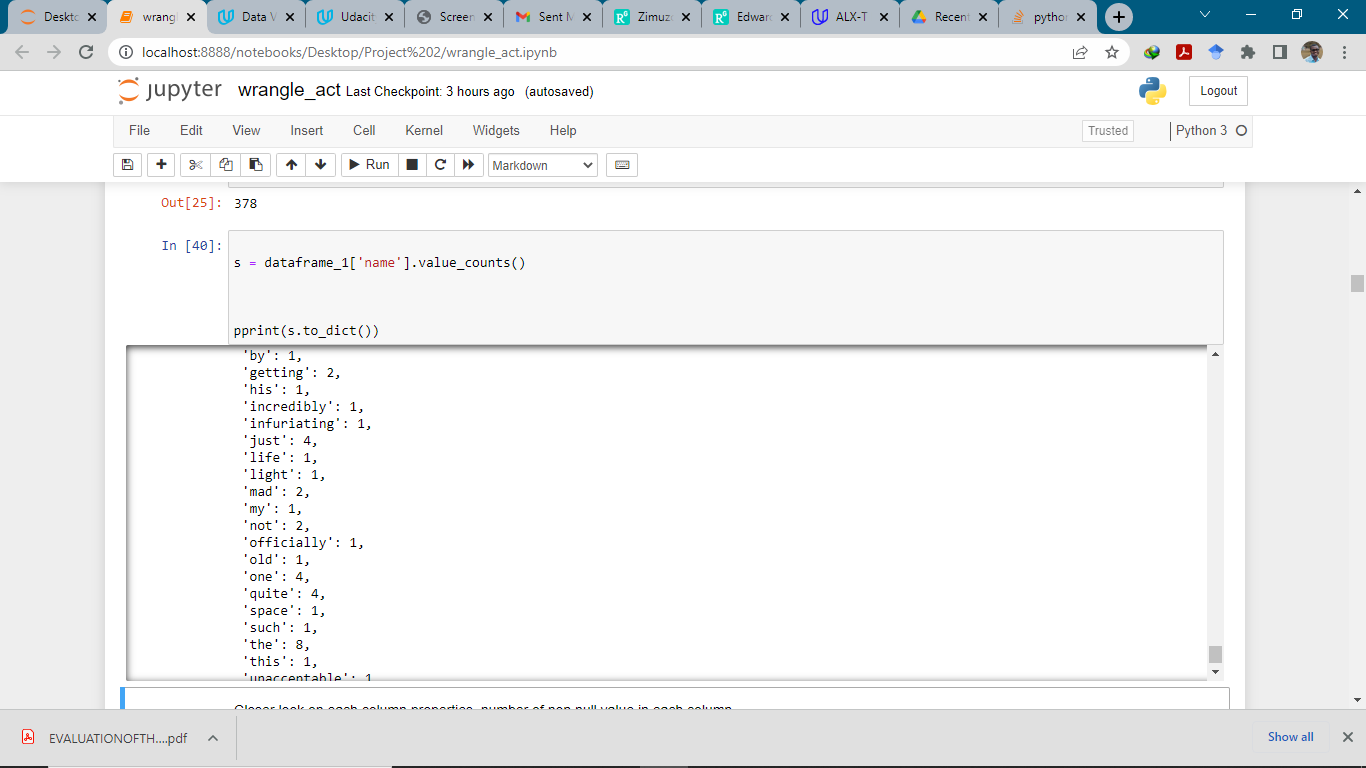

In the name column as seen from the picture above,
This are obviously not dogs name.
Also  notice they start with lower case, indicating not a name

##### Inspection of Dataframe 2

View general arrangement of column in the data frame

In [14]:
# We first see the nature of the arrange and general appearance of dataframe

dataframe_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [15]:
dataframe_2['p1'].nunique()

378

Closer look on each column properties, number of non null value in each column


In [16]:
#For a closer observation 
dataframe_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Check the 'img_num' cloumn

In [17]:
k = dataframe_2['img_num'].value_counts()



pprint(k.to_dict())

{1: 1780, 2: 198, 3: 66, 4: 31}


Summary of dataframe statistics

In [18]:
#to view a summary statistics of the said dataframe
dataframe_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Inspection of Dataframe 3

View general arrangement of column in the data frame

In [19]:
# We first see the nature of the arrange and general appearance of dataframe

dataframe_3.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Closer look on each column properties, number of non null value in each column


In [20]:
#For a closer observation 
dataframe_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

In [21]:
l = dataframe_3['entities'].value_counts()



pprint(l.to_dict())

{"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 340, 'h': 255, 'resize': 'fit'}, 'medium': {'w': 600, 'h': 450, 'resize': 'fit'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}}}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'url': 'https://t.co/r7mO

 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 685321578897354753, 'id_str': '685321578897354753', 'indices': [70, 93], 'media_url': 'http://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg', 'url': 'https://t.co/MbgG95mUdu', 'display_url': 'pic.twitter.com/MbgG95mUdu', 'expanded_url': 'https://twitter.com/dog_rates/status/685321586178670592/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 600, 'h': 690, 'resize': 'fit'}, 'small': {'w': 340, 'h': 391, 'resize': 'fit'}, 'large': {'w': 889, 'h': 1023, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}}}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 685325091882799104, 'id_str': '685325091882799104', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg', 'url': 'https://t.co/VGPH0T

 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 690597153803149313, 'id_str': '690597153803149313', 'indices': [120, 143], 'media_url': 'http://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg', 'url': 'https://t.co/Nwi3SYe8KA', 'display_url': 'pic.twitter.com/Nwi3SYe8KA', 'expanded_url': 'https://twitter.com/dog_rates/status/690597161306841088/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 600, 'h': 539, 'resize': 'fit'}, 'small': {'w': 340, 'h': 306, 'resize': 'fit'}, 'large': {'w': 848, 'h': 762, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}}}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 690649985252220930, 'id_str': '690649985252220930', 'indices': [72, 95], 'media_url': 'http://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg', 'url': 'https://t.co/CneG2Z

 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 771136641138319360, 'id_str': '771136641138319360', 'indices': [107, 130], 'media_url': 'http://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg', 'url': 'https://t.co/8VEDZKHddR', 'display_url': 'pic.twitter.com/8VEDZKHddR', 'expanded_url': 'https://twitter.com/dog_rates/status/771136648247640064/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'}, 'medium': {'w': 1200, 'h': 900, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 2048, 'h': 1536, 'resize': 'fit'}}}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 771380787874828288, 'id_str': '771380787874828288', 'indices': [117, 140], 'media_url': 'http://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg', 'url': 'https://t.co/s

 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 784431410685902849, 'id_str': '784431410685902849', 'indices': [78, 101], 'media_url': 'http://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg', 'url': 'https://t.co/PHA1vtqqpt', 'display_url': 'pic.twitter.com/PHA1vtqqpt', 'expanded_url': 'https://twitter.com/dog_rates/status/784431430411685888/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 453, 'resize': 'fit'}, 'medium': {'w': 1023, 'h': 682, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1023, 'h': 682, 'resize': 'fit'}}}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 784517508296478720, 'id_str': '784517508296478720', 'indices': [84, 107], 'media_url': 'http://pbs.twimg.com/media/CuMqhGoWEAAOVE5.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CuMqhGoWEAAOVE5.jpg', 'url': 'https://t.co/p6fg

 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/G4fNhzelDv', 'expanded_url': 'https://vine.co/v/iLTZmtE1FTB', 'display_url': 'vine.co/v/iLTZmtE1FTB', 'indices': [90, 113]}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/GJ8rozumsy', 'expanded_url': 'https://twitter.com/shomaristone/status/846484798663245829', 'display_url': 'twitter.com/shomaristone/s…', 'indices': [67, 90]}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Gu5wHx3CBd', 'expanded_url': 'https://twitter.com/brianstack153/status/796796054100471809', 'display_url': 'twitter.com/brianstack153/…', 'indices': [49, 72]}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/HCXQL4fGVZ', 'expanded_url': 'https://vine.co/v/5W0bdhEUUVT', 'display_url': 'vine.co/v/5W0bdhEUUVT', 'indices': [92, 115]}]}": 1,
 "{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': 

Summary of dataframe statistics

In [22]:
#to view a summary statistics of the said dataframe
dataframe_3.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


Identity the number of distinct values per column in this dataframe

In [23]:
#to view the number of distinct value per column in dataframe
dataframe_3.nunique()

created_at                       2354
id                               2354
id_str                           2354
full_text                        2354
truncated                           1
display_text_range                143
entities                         2253
extended_entities                2073
source                              4
in_reply_to_status_id              77
in_reply_to_status_id_str          77
in_reply_to_user_id                31
in_reply_to_user_id_str            31
in_reply_to_screen_name            31
user                               79
geo                                 0
coordinates                         0
place                               1
contributors                        0
is_quote_status                     2
retweet_count                    1724
favorite_count                   2007
favorited                           2
retweeted                           1
possibly_sensitive                  1
possibly_sensitive_appealable       1
lang        

Identify retweets as they are not needed

In [24]:
#To identify number of tweet that are not retweet
dataframe_1['retweeted_status_id'].isnull().sum()

2175

examine the 'created_at' column

In [25]:

k = dataframe_3['created_at'].value_counts()



pprint(k.to_dict())

{'2015-11-15 22:32:08+00:00': 1,
 '2015-11-15 23:05:30+00:00': 1,
 '2015-11-15 23:21:54+00:00': 1,
 '2015-11-16 00:04:52+00:00': 1,
 '2015-11-16 00:24:50+00:00': 1,
 '2015-11-16 00:30:50+00:00': 1,
 '2015-11-16 00:35:11+00:00': 1,
 '2015-11-16 00:49:46+00:00': 1,
 '2015-11-16 00:55:59+00:00': 1,
 '2015-11-16 01:01:59+00:00': 1,
 '2015-11-16 01:22:45+00:00': 1,
 '2015-11-16 01:52:02+00:00': 1,
 '2015-11-16 01:59:36+00:00': 1,
 '2015-11-16 02:38:37+00:00': 1,
 '2015-11-16 03:22:39+00:00': 1,
 '2015-11-16 03:44:34+00:00': 1,
 '2015-11-16 03:55:04+00:00': 1,
 '2015-11-16 04:02:55+00:00': 1,
 '2015-11-16 14:57:41+00:00': 1,
 '2015-11-16 15:14:19+00:00': 1,
 '2015-11-16 16:11:11+00:00': 1,
 '2015-11-16 16:37:02+00:00': 1,
 '2015-11-16 19:31:45+00:00': 1,
 '2015-11-16 20:01:42+00:00': 1,
 '2015-11-16 20:32:58+00:00': 1,
 '2015-11-16 21:10:36+00:00': 1,
 '2015-11-16 21:54:18+00:00': 1,
 '2015-11-16 23:23:41+00:00': 1,
 '2015-11-17 00:06:54+00:00': 1,
 '2015-11-17 00:24:19+00:00': 1,
 '2015-11-

 '2015-12-31 20:39:41+00:00': 1,
 '2015-12-31 22:57:47+00:00': 1,
 '2016-01-01 02:29:49+00:00': 1,
 '2016-01-01 05:00:24+00:00': 1,
 '2016-01-01 06:22:03+00:00': 1,
 '2016-01-01 16:30:13+00:00': 1,
 '2016-01-01 21:00:32+00:00': 1,
 '2016-01-02 00:14:32+00:00': 1,
 '2016-01-02 01:33:43+00:00': 1,
 '2016-01-02 02:23:45+00:00': 1,
 '2016-01-02 04:27:31+00:00': 1,
 '2016-01-02 18:43:31+00:00': 1,
 '2016-01-02 20:58:09+00:00': 1,
 '2016-01-03 00:47:59+00:00': 1,
 '2016-01-03 01:39:57+00:00': 1,
 '2016-01-03 02:53:17+00:00': 1,
 '2016-01-03 04:01:13+00:00': 1,
 '2016-01-03 05:11:12+00:00': 1,
 '2016-01-03 20:12:10+00:00': 1,
 '2016-01-03 22:14:26+00:00': 1,
 '2016-01-04 01:53:37+00:00': 1,
 '2016-01-04 02:18:42+00:00': 1,
 '2016-01-04 03:18:23+00:00': 1,
 '2016-01-04 03:28:54+00:00': 1,
 '2016-01-04 03:50:08+00:00': 1,
 '2016-01-04 19:43:10+00:00': 1,
 '2016-01-04 21:23:02+00:00': 1,
 '2016-01-04 23:02:22+00:00': 1,
 '2016-01-05 01:00:50+00:00': 1,
 '2016-01-05 01:44:52+00:00': 1,
 '2016-01-

 '2016-04-17 00:58:53+00:00': 1,
 '2016-04-20 02:30:23+00:00': 1,
 '2016-04-21 02:25:47+00:00': 1,
 '2016-04-21 16:00:57+00:00': 1,
 '2016-04-23 00:41:42+00:00': 1,
 '2016-04-23 01:41:59+00:00': 1,
 '2016-04-23 16:34:28+00:00': 1,
 '2016-04-23 22:38:43+00:00': 1,
 '2016-04-24 01:24:35+00:00': 1,
 '2016-04-24 01:38:33+00:00': 1,
 '2016-04-25 01:12:38+00:00': 1,
 '2016-04-26 01:26:53+00:00': 1,
 '2016-04-26 15:29:30+00:00': 1,
 '2016-04-27 22:57:10+00:00': 1,
 '2016-04-28 16:52:08+00:00': 1,
 '2016-04-28 20:40:11+00:00': 1,
 '2016-04-29 00:21:01+00:00': 1,
 '2016-04-30 01:41:23+00:00': 1,
 '2016-05-01 17:38:46+00:00': 1,
 '2016-05-01 21:32:40+00:00': 1,
 '2016-05-02 00:43:25+00:00': 1,
 '2016-05-02 15:20:13+00:00': 1,
 '2016-05-02 16:38:15+00:00': 1,
 '2016-05-02 23:59:09+00:00': 1,
 '2016-05-03 01:50:44+00:00': 1,
 '2016-05-03 15:46:33+00:00': 1,
 '2016-05-03 23:42:26+00:00': 1,
 '2016-05-04 02:26:00+00:00': 1,
 '2016-05-05 00:16:48+00:00': 1,
 '2016-05-05 01:35:26+00:00': 1,
 '2016-05-

 '2016-10-24 15:53:19+00:00': 1,
 '2016-10-24 23:37:28+00:00': 1,
 '2016-10-25 01:14:59+00:00': 1,
 '2016-10-25 16:00:09+00:00': 1,
 '2016-10-25 18:44:32+00:00': 1,
 '2016-10-25 21:18:40+00:00': 1,
 '2016-10-26 16:14:55+00:00': 1,
 '2016-10-26 22:31:36+00:00': 1,
 '2016-10-27 16:06:04+00:00': 1,
 '2016-10-27 22:53:48+00:00': 1,
 '2016-10-27 23:17:38+00:00': 1,
 '2016-10-27 23:30:09+00:00': 1,
 '2016-10-28 01:58:16+00:00': 1,
 '2016-10-28 17:07:05+00:00': 1,
 '2016-10-29 15:55:58+00:00': 1,
 '2016-10-30 17:02:53+00:00': 1,
 '2016-10-31 00:20:11+00:00': 1,
 '2016-10-31 02:17:31+00:00': 1,
 '2016-10-31 16:00:13+00:00': 1,
 '2016-10-31 17:00:11+00:00': 1,
 '2016-10-31 18:00:14+00:00': 1,
 '2016-10-31 19:00:10+00:00': 1,
 '2016-10-31 20:00:05+00:00': 1,
 '2016-10-31 21:00:23+00:00': 1,
 '2016-10-31 22:00:04+00:00': 1,
 '2016-10-31 23:00:11+00:00': 1,
 '2016-11-01 00:00:38+00:00': 1,
 '2016-11-01 01:00:05+00:00': 1,
 '2016-11-01 02:00:14+00:00': 1,
 '2016-11-01 03:00:09+00:00': 1,
 '2016-11-

### Quality issues 

1. Id columns such as 'retweeted_status_id', 'retweeted_status_user_id', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id' are not supposed to be float or interger but rather strings.
2. Some of the values in the  'name' column are wrong.
3. 'Timestamp', and 'created_at' have an object datatype instead of time.
4. 'Contributors' column is to be of object datatype not float.
5. The "rating_numerator", "rating_denominator", and "rating" have outliers and need to be cut off. Secondly, rating denominator can not be Zero.
6. Columns with only one distinct value or multiple distinct values in excess of 200 would furnish us with little or no information.
7. All tweet are not older than August 1st, 2017.
8. Columns with a high number of null values As a result, columns with less than 20% of their values were removed; those that are identical in nature and provide us with very similar data should be removed; those that are redundant to the newly created "breed" column need to be removed and those that do not provide relevant information need to be removed. (Rows of retweets need to be removed.)

### Tidiness issues
1. The three dataframes should be merged into one. 

2. Dog stage was spread across four columns. So first, we identified the actual dog stage for each row while assign unavailable to aspect no give.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data


data_1 = dataframe_1
data_2 = dataframe_2
data_3 = dataframe_3

### Issue #0:

#### Define:
##### Issue: 
Not an issue per say, for clarity and I would love the three seperate dataframes to have an identical column name which i can adopt as the point of reference to joining
##### Solution:
Rename of the column name "id" in dataframe 3 to "tweet_id", so we can easily identify the point for merge dataframes subsequently.

#### Code

In [27]:
#we would need all three data frames to have a common link
#So we would rename the column title "id" to "tweet_id" in the third dataframe
    
dataframe_3.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [28]:
dataframe_3.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Issue #1:

#### Define:
##### Issue:
The tree dataframes should be merged into one.
##### Solution:
This was done with the aid of the "Merge" command.

#### Code

In [29]:
#merge data frames into one data frame
    
data = dataframe_1.merge(
        
        dataframe_2, how='outer', on='tweet_id'
        
        ).merge(
        
        dataframe_3, how='outer', on='tweet_id'
        
        ).set_index(
        
        'tweet_id'
        )

#### Test

In [30]:
data.head(2)

,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,39467.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,33819.0,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Issue #2:

#### Define:
##### Issue:
The id columns are supposed to be strings.
##### Solution:
First, we identify all the id column then convert their datatype to string.

#### Code

In [31]:
#create a dataframe of the column headers
column_head = pd.DataFrame(data.columns)

In [32]:
#Identify column which contain the charaters "id"

mask_id = column_head[0].str.contains('id')
ids = column_head[mask_id]


In [33]:
#create list of the said id names
column = ids[0].to_list()

In [34]:
#effect change in the columns

data[column] = data[column].astype(object)

#### Test

In [35]:
data[column].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   in_reply_to_status_id_x    78 non-null     object
 1   in_reply_to_user_id_x      78 non-null     object
 2   retweeted_status_id        181 non-null    object
 3   retweeted_status_user_id   181 non-null    object
 4   id_str                     2354 non-null   object
 5   in_reply_to_status_id_y    78 non-null     object
 6   in_reply_to_status_id_str  78 non-null     object
 7   in_reply_to_user_id_y      78 non-null     object
 8   in_reply_to_user_id_str    78 non-null     object
 9   quoted_status_id           29 non-null     object
 10  quoted_status_id_str       29 non-null     object
dtypes: object(11)
memory usage: 220.9+ KB


### Issue #3:

#### Define:
##### Issue: 
Some dog names are just wrong.
##### Solution:
Firstly, we identify said rows by finding row under the 'name' column.
We then replace said errors with none.

#### Code

In [36]:
#identify said row
#this done by identifying row in the name column without a single upper case charater
mask_name_lower = data['name'].str.islower()

In [37]:
#we apprended all of the such name to a list
list_name = data[mask_name_lower]['name'].to_list()

In [38]:
#using the 'replace' command we perform our intended operation
data['name'].replace(list_name, inplace=True)

#### Test

In [39]:
s = data['name'].value_counts()



pprint(s.to_dict())

{'Abby': 2,
 'Ace': 1,
 'Acro': 1,
 'Adele': 1,
 'Aiden': 1,
 'Aja': 1,
 'Akumi': 1,
 'Al': 1,
 'Albert': 3,
 'Albus': 2,
 'Aldrick': 1,
 'Alejandro': 1,
 'Alexander': 1,
 'Alexanderson': 1,
 'Alf': 1,
 'Alfie': 5,
 'Alfy': 1,
 'Alice': 2,
 'Amber': 1,
 'Ambrose': 1,
 'Amy': 1,
 'Amélie': 1,
 'Anakin': 2,
 'Andru': 1,
 'Andy': 1,
 'Angel': 1,
 'Anna': 1,
 'Anthony': 1,
 'Antony': 1,
 'Apollo': 1,
 'Aqua': 1,
 'Archie': 4,
 'Arlen': 1,
 'Arlo': 1,
 'Arnie': 3,
 'Arnold': 1,
 'Arya': 1,
 'Ash': 2,
 'Asher': 1,
 'Ashleigh': 1,
 'Aspen': 2,
 'Astrid': 2,
 'Atlas': 2,
 'Atticus': 2,
 'Aubie': 1,
 'Augie': 1,
 'Autumn': 1,
 'Ava': 2,
 'Axel': 2,
 'Bailey': 7,
 'Baloo': 2,
 'Balto': 2,
 'Banditt': 2,
 'Banjo': 1,
 'Barclay': 1,
 'Barney': 1,
 'Baron': 1,
 'Barry': 1,
 'Batdog': 1,
 'Bauer': 1,
 'Baxter': 2,
 'Bayley': 1,
 'BeBe': 1,
 'Bear': 4,
 'Beau': 4,
 'Beckham': 1,
 'Beebop': 1,
 'Beemo': 1,
 'Bell': 2,
 'Bella': 6,
 'Belle': 2,
 'Ben': 1,
 'Benedict': 2,
 'Benji': 2,
 'Benny': 1,
 'Ben

### Issue #4:

#### Define:
##### Issue:
the "time_stamp" and 'created_at' have wrong datatype
##### Solution:
we need to change the data type to date time. 

#### Code

In [40]:
column = ['timestamp', 'created_at']

In [41]:
data['timestamp']= pd.to_datetime(data['timestamp'])      
data['created_at']= pd.to_datetime(data['created_at'])

#### Test

In [42]:
data[column].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   timestamp   2356 non-null   datetime64[ns, UTC]
 1   created_at  2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 55.2 KB


### Issue #5:

#### Define:
##### Issue:
the 'contributors' has wrong datatype
##### Solution:
Change it from float to object

#### Code

In [43]:
data['contributors'] = data['contributors'].astype(object)

#### Test

In [44]:
data['contributors'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Series name: contributors
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 36.8+ KB


### Issue #6:

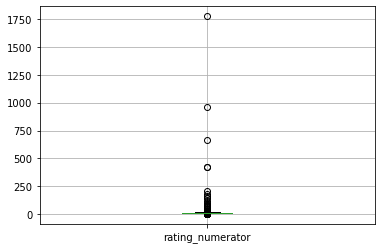

In [45]:
data['rating'] = round(data["rating_numerator"]/data["rating_denominator"]  * 10)
data.boxplot(column=['rating_numerator']);


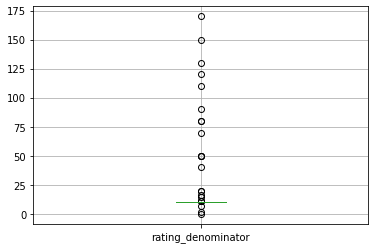

In [46]:
data.boxplot(column=['rating_denominator']);


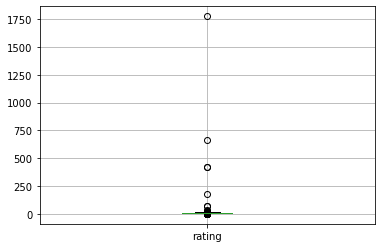

In [47]:
data.boxplot(column=['rating']);

#### Define:
##### Issue:
We have identify issue of outliers and presence of zero in the 'rating_denominator'

##### Solution:
We would drop the top 1% to remove this outliers"
Also remove zero

#### Code

In [48]:
#when we apply the decribe to the 'rating_numerator' column we find out that 75% of the values are less 
#than 450 and with histogram we can see data is high skewed so we have to cut off this outliers
    
    
low, high = data["rating_numerator"].quantile([0, 0.99])
mask_rating_numerator = data["rating_numerator"].between(low, high)
mask_rating_denominator = data['rating_denominator'] > 2 
mask_rating_numerator_limit = data["rating_numerator"] > 0

data = data[mask_rating_numerator & mask_rating_denominator & mask_rating_numerator_limit]

In [49]:
#### Test
data['rating_numerator'].describe()

count    2329.000000
mean       10.711464
std         2.174132
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        20.000000
Name: rating_numerator, dtype: float64

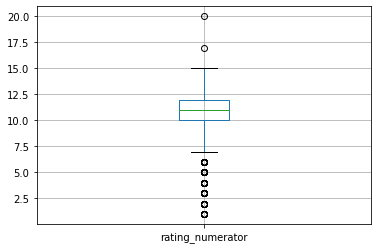

In [50]:
data.boxplot(column=['rating_numerator']);

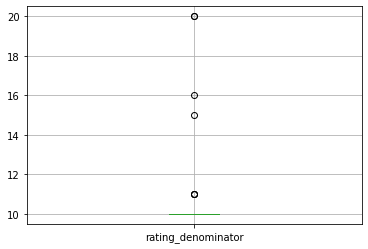

In [51]:
data.boxplot(column=['rating_denominator']);

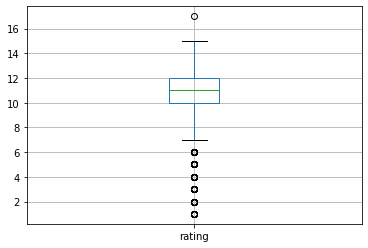

In [52]:
data.boxplot(column=['rating']);

### Issue #7:

#### Define
##### Issue: 
Only tweets older than August 1st, 2017 are relevant.
##### Solution:
The rows that do not meet up with the above reqirement should be identify them and subsequently systematically drop them.

#### Code

In [53]:
mask_timestamp = data['timestamp'] <= ('2017-08-01 23:59:59.000000')
data = data[mask_timestamp]

#### Test

In [54]:
(data['timestamp'] >'2017-08-01 23:59:59.000000').value_counts()

False    2329
Name: timestamp, dtype: int64

### Issue #11***:

#### Define:
##### Issue:
Not an issue just my preference
##### Solution:
Normalize the breed to on column

#### Code

In [55]:
#drop row where dog breed not correctly classified
mask_p1_dog = data['p1_dog'] == True
mask_p2_dog = data['p2_dog'] == True
mask_p3_dog = data['p3_dog'] == True
    
data = data[mask_p1_dog | mask_p2_dog | mask_p3_dog]
    
    
    
    #create dog breed column
breed = []
for index, row in data.iterrows():
    if row['p1_dog'] == True:
        breed.append(row['p1'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])

        
data['breed'] = breed
    
    
#Drop any columns that would constitute leakage for the target "breed"
column = ['p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog']
data.drop(columns = column, inplace=True)

#### Test

In [56]:
data.head(1)

,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,rating,breed
tweet_id,,,,,,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,False,0.0,0.0,en,NaN,NaN,NaN,NaN,13.0,Chihuahua


### Issue #8:

#### Define
##### Issue: 
So columns excluding the index column "tweet_id" have multiple values in the excess of 1000 s.
##### Solution:
This columns will not provide us useful insight, so we need to identify them and subsequently systematically drop them.

#### Code

In [57]:
#Drop columns containing high-cardinality categorical values
#that is columns with many unquie values as obtaining information from them are not substanial
    
percentage = pd.DataFrame(
        data.nunique()
        ).reset_index()
    
    
columns_with_very_low_and_very_high_cardinity_values = []
    
#we would drop columns with more than 120 distint values in it 
for i in range(len(percentage)):
        
    if ((percentage.loc[i, 0]) > 200):
            
        columns_with_very_low_and_very_high_cardinity_values.append(percentage.loc[i, "index"])
            
#print(columns_with_very_low_and_very_high_cardinity_values)
    
data.drop(columns = columns_with_very_low_and_very_high_cardinity_values, inplace=True)
    

#### Test

In [58]:
data.nunique()

in_reply_to_status_id_x           18
in_reply_to_user_id_x              1
source_x                           3
retweeted_status_id               65
retweeted_status_user_id           6
retweeted_status_timestamp        65
rating_numerator                  13
rating_denominator                 3
doggo                              2
floofer                            2
pupper                             2
puppo                              2
img_num                            4
truncated                          1
display_text_range               111
source_y                           3
in_reply_to_status_id_y           18
in_reply_to_status_id_str         18
in_reply_to_user_id_y              1
in_reply_to_user_id_str            1
in_reply_to_screen_name            1
user                              73
geo                                0
coordinates                        0
place                              1
contributors                       0
is_quote_status                    1
f

### Issue #9:

#### Define
##### Issue: 
Column that furnish with information about the dog stage is needed.
##### Solution:
We need to :
Firstly, change charaters in the 'doggo', 'floofer', 'pupper', 'puppo' for ease during iteration.
Secondly, extract the dog stage for each row adn for each not identified indicated as "unavailable".
Thirdly, create new column for this "dog_stage"
Lastly, proceed to drop this irrelevant columns.


#### Code

In [59]:
data = data.replace({'doggo': 1, 'None': 0, 'floofer': 1, 'pupper':1,'puppo':1, 'True': 1, 'False': 0})


In [60]:
#create dog breed column
dog_stage = []

for idx, row in data.iterrows():
    if row['doggo'] == 1:
        dog_stage.append('doggo')
    elif row['floofer'] == 1:
        dog_stage.append('floofer')
    elif row['pupper'] == 1:
        dog_stage.append('pupper')
    elif row['puppo'] == True:
        dog_stage.append('puppo')
    else:
        dog_stage.append('unclassified')
        
        
data['dog_stage'] = dog_stage


In [61]:
column = ['doggo', 'floofer', 'pupper', 'puppo']
data.drop(columns = column, inplace=True)

#### Test

In [62]:
data.head(2)

,in_reply_to_status_id_x,in_reply_to_user_id_x,source_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,truncated,...,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,rating,breed,dog_stage
tweet_id,,,,,,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,13,10,1.0,False,...,0.0,0.0,en,NaN,NaN,NaN,NaN,13.0,Chihuahua,unclassified
891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,12,10,1.0,False,...,0.0,0.0,en,NaN,NaN,NaN,NaN,12.0,Chihuahua,unclassified


### Issue #10:

#### Define:
##### Issue:
Columns with a high number of null values As a result
columns with less than 20% of their values were removed
Column that are identical in nature and provide us with very similar data should be removed
column that are redundant to the newly created "breed" 
column need to be removed and those that do not provide relevant information need to be removed.
Rows of retweets need to be removed.)

##### Solution:
Drop all of them

#### Code

In [63]:
#drop all row for retweets
data = data[data.retweeted_status_id.isnull()]

In [64]:
#We need to drop columns with high null values
    
percentage = pd.DataFrame(
        data.isnull().mean() * 100
        ).reset_index()
    
columns_with_large_missing_values = []
    
    # We would drop column missing more than 20% of their column values
    
for i in range(len(percentage)):
        
    if (percentage.loc[i, 0]) > 20:
        columns_with_large_missing_values.append(percentage.loc[i, "index"])
            
data.drop(columns = columns_with_large_missing_values, inplace=True)
    

In [65]:
#Drop columns containing low-cardinality categorical values
column = ['truncated', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'is_quote_status']
data.drop(columns=column, inplace=True)

In [66]:
#columns not need or rather unneccesary
column = ['source_x', 'source_y', 'favorited',  'display_text_range', 'user']
data.drop(columns = column, inplace=True)

#### Test

In [67]:
pd.DataFrame(data.isnull().mean() * 100)

,0
rating_numerator,0.0
rating_denominator,0.0
img_num,0.0
rating,0.0
breed,0.0
dog_stage,0.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
#exporting clean dataframe to an external csv file titled "twitter_archive_master"
data.to_csv('twitter_archive_master.csv', index=False)

##### Data gathering, assessing and cleaning has successfully been carried out.
##### We would now proceed for the analyzing and visualizing phase. We would now proceed for the analyzing and visualizing phase.

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [69]:
bad_classification = round((data['rating'] > 10).sum()/len(data)  * 100)
print(f"""
          From above dataframe,
          we can see that {bad_classification}% of the raings provide are wrong.
          This emphasis the need to strict rating input
          """ )


          From above dataframe,
          we can see that 62% of the raings provide are wrong.
          This emphasis the need to strict rating input
          


In [70]:

def dog_stage(stage):
    listA = data[data['dog_stage'] == stage]
    listA = listA.sort_values('rating', ascending=False)

    breed = []
    for index, row in listA.iterrows():
        if row['dog_stage'] not in breed:
            breed.append(row['breed'])
        if len(breed) == 5:
            break

    print(f"""
                For {stage} stage dogs,
                it was seen that the {breed} 
                of dogs were the five highly most rated of the all the dog breed.{space}""")
        
dog_stage('doggo')
dog_stage('floofer')
dog_stage('pupper')
dog_stage('puppo')
dog_stage('unclassified')
    


                For doggo stage dogs,
                it was seen that the ['Pembroke', 'standard_poodle', 'Bedlington_terrier', 'Pembroke', 'Irish_setter'] 
                of dogs were the five highly most rated of the all the dog breed. 	


                For floofer stage dogs,
                it was seen that the ['chow', 'Samoyed', 'Samoyed', 'golden_retriever', 'wire-haired_fox_terrier'] 
                of dogs were the five highly most rated of the all the dog breed. 	


                For pupper stage dogs,
                it was seen that the ['Samoyed', 'golden_retriever', 'Pomeranian', 'black-and-tan_coonhound', 'Tibetan_mastiff'] 
                of dogs were the five highly most rated of the all the dog breed. 	


                For puppo stage dogs,
                it was seen that the ['Rottweiler', 'Pembroke', 'Italian_greyhound', 'Cardigan', 'German_shepherd'] 
                of dogs were the five highly most rated of the all the dog breed. 	


         

In [71]:

listB = data.groupby(['breed'])['rating'].mean().sort_values(ascending=True).head(5)
breed = list(listB.index.values)
    
print(f"""
            For breed of dogs,
            it was seen that the
            {breed}
             breeds of dogs were the five lowly rated breed of all the dog breed.
        """)


            For breed of dogs,
            it was seen that the
            ['Japanese_spaniel', 'soft-coated_wheaten_terrier', 'Walker_hound', 'Scotch_terrier', 'Tibetan_terrier']
             breeds of dogs were the five lowly rated breed of all the dog breed.
        


### Insights:
<ul>
<li><a href="#is1">Insight 1</a></li>
    Shows the percentage of the data that has bad classification.
    That have values greater than 10  for rating.
<li><a href="#is2">Insight 2</a></li>
    Shows the dog breeds with the highest rating.
    For each dog stage.
<li><a href="#is3">Insight 3</a></li>
    Shows the dog breeds with the overall lowest rating.
</ul>

### Visualization

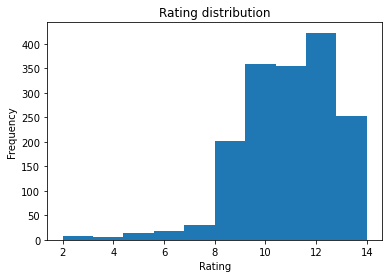

In [72]:
data['rating'].plot(kind='hist')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating distribution");



        As we can see, there is no signifiant correlation between
        dog stage and rating.
        Which there appears to be more relationship between the number of picture to the rating
    
    


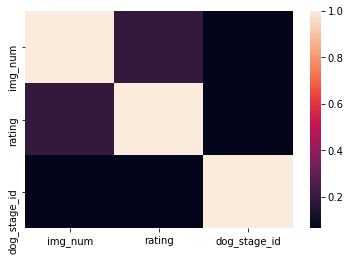

In [73]:
dog_stage = []
for index, row in data.iterrows():
    if row['dog_stage'] == 'doggo':
        dog_stage.append(1)
    elif row['dog_stage'] == 'floofer':
        dog_stage.append(2)
    elif row['dog_stage'] == 'pupper':
        dog_stage.append(3)
    elif row['dog_stage'] == 'puppo':
        dog_stage.append(4)
    else:
        dog_stage.append(0)

        
data['dog_stage_id'] = dog_stage
    
    
column = ['rating_numerator', 'rating_denominator']
corr = data.drop(columns=column).corr()
sns.heatmap(corr)
    
print("""
        As we can see, there is no signifiant correlation between
        dog stage and rating.
        Which there appears to be more relationship between the number of picture to the rating
    
    """)


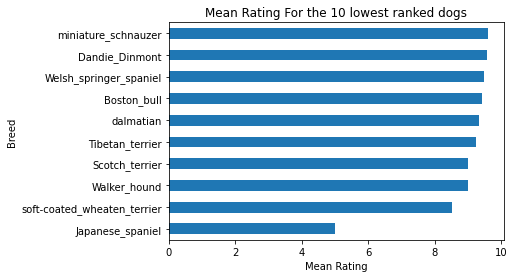

In [74]:
#to show the mean rating for the 10 lowest ranked breeds
    
data.groupby(['breed'])[
        'rating'
    ].mean().sort_values(
        ascending=True
    ).head(10).plot(kind='barh')
plt.xlabel("Mean Rating")
plt.ylabel("Breed")
plt.title("Mean Rating For the 10 lowest ranked dogs");

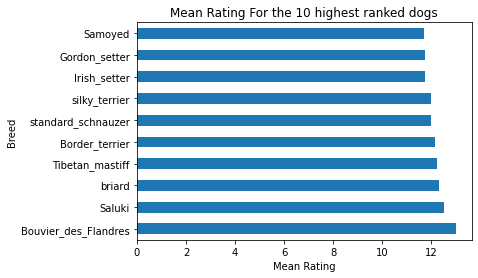

In [75]:
#to show the mean rating for the 10 highest ranked breeds
    
data.groupby(['breed'])[
        'rating'
    ].mean().sort_values(
        ascending=False
    ).head(10).plot(kind='barh')
plt.xlabel("Mean Rating")
plt.ylabel("Breed")
plt.title("Mean Rating For the 10 highest ranked dogs");

In [76]:
path = 'wrangle_act.pdf'

subprocess.Popen([path], shell=True);

In [77]:
path = 'act_report.pdf'

subprocess.Popen([path], shell=True);

### END